<a href="https://www.kaggle.com/code/abdelazizelsawy/cosmetics-company-in-eg?scriptVersionId=99942990" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data analysis for a  pharmacy supplies company

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling1">Data Wrangling *1*</a></li>
<li><a href="#assessing1">Data Assessing *1*</a></li>
<li><a href="#cleaning">Data Cleaning</a></li> 
<li><a href="#assessing2">Data Assessing *2*</a></li>
<li><a href="#wrangling2">Data Wrangling *2*</a></li>    
</ul>


<a id='intro'></a>
## Introduction
 This data set contains 4 sheets of data from company working in the field of medical supplies
 
the products sheet columns :  DATE_ , ClintName , AccountId , ProductName , ProductId , CompanyId , CATEGORY1 , CATEGORY3 , InvoicesId , UnitSellPrice , ConsumerPrice , CostPrice , QTY.

the Proprties sheet columns : PROPRTIES_ID , PROPRTIES_NAME , PROPRTIES_TYPE.

the company sheet columns :	COP_ID , COP_NAME.

the account sheet columns :	CLIENT_NAME , CLIENT_ID , LOCATION_ID , LOCATION_NAME .


## In Products
category1 is the main category & category3 is the subcategory ids ... 
CompanyId is manufactureid , consumer price is the suggested selling price per piece ... which will give us a good point of view about the retailer sales .

## In Proprties
the proprties name is for both the category and subcategory and propeties type's job is to clarify the that it`s category or subcategory.

## In Companies 
the COP_NAME is the manufacture name

**Let's start**

### Question(s) for Analysis
The first step is to call the libraries see the head for each data ,the form of each the data ,The next step is to describe the data , display data information, key factor of data then we merge all the four sheets in one dataframe.

In [1]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snb
from matplotlib import pyplot as plt
from IPython import display


In [3]:
dfs={'df':'Invoices and products.xlsx','prop':'proprties.xlsx','comp':'company.xlsx','AccRegion':'account  region.xlsx'}
path= "../input/Cosmetics-company/"
for key,value in list(dfs.items()):
    exec(f'{key}=pd.read_excel("{path}{value}")', globals())
    exec(f'{key}.columns={key}.columns.str.lower()', globals())

In [4]:
df.head()

,date_,clintname,accountid,productname,productid,companyid,category1,category3,invoicesid,unitsellprice,consumerprice,costprice,qty
0,2020-05-03,clint2042,1951,سويت حرير مزيل شعر,5307,31.0,1.0,26.0,3,4.31958,9.0,3.750000,24.0
1,2020-05-03,clint2042,1951,ايزي سويت عرض 3 قطع/عسل نحل-ورد-زيتون سعر جديد,4307,42.0,1.0,26.0,3,4.48166,8.0,3.500000,12.0
2,2020-05-03,clint2042,1951,ماجيك كريم,5954,31.0,1.0,7.0,3,7.75000,9.5,6.833000,6.0
3,2020-05-03,clint2042,1951,بنادور كريم ابيض,4660,31.0,1.0,7.0,3,41.55833,55.0,33.006798,6.0
4,2020-05-03,clint2042,1951,بنادور كريم اصفر,4661,31.0,1.0,7.0,3,41.55666,55.0,36.666000,3.0


In [5]:
df.shape

(523318, 13)

In [6]:
df.describe()

,accountid,productid,companyid,category1,category3,invoicesid,unitsellprice,consumerprice,costprice,qty
count,523318.000000,523318.000000,520817.000000,522552.000000,487439.000000,523318.000000,523318.000000,523318.000000,523318.000000,523318.000000
mean,1412.515946,5916.807968,39.674907,1.480402,49.765981,24038.573082,22.358202,22.045283,20.038836,8.289315
std,711.945845,1216.952143,19.759017,2.297926,44.885647,14543.382508,32.834781,33.988589,32.373985,52.950912
min,141.000000,4181.000000,0.000000,1.000000,4.000000,3.000000,0.000000,0.000000,-134.860016,0.005000
25%,862.000000,5028.000000,31.000000,1.000000,16.000000,11236.000000,6.450000,5.500000,5.500000,1.000000
50%,1326.000000,5701.000000,33.000000,1.000000,39.000000,23471.000000,12.220000,13.000000,10.661362,2.000000
75%,2042.000000,6509.000000,51.000000,2.000000,70.000000,36380.000000,24.000000,26.000000,21.000000,5.000000
max,2764.000000,9710.000000,86.000000,167.000000,167.000000,50313.000000,1760.120000,1000.000000,8167.000000,15000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523318 entries, 0 to 523317
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_          523318 non-null  datetime64[ns]
 1   clintname      523318 non-null  object        
 2   accountid      523318 non-null  int64         
 3   productname    523318 non-null  object        
 4   productid      523318 non-null  int64         
 5   companyid      520817 non-null  float64       
 6   category1      522552 non-null  float64       
 7   category3      487439 non-null  float64       
 8   invoicesid     523318 non-null  int64         
 9   unitsellprice  523318 non-null  float64       
 10  consumerprice  523318 non-null  float64       
 11  costprice      523318 non-null  float64       
 12  qty            523318 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 51.9+ MB


In [8]:
df.nunique()

date_              611
clintname          898
accountid          898
productname       5222
productid         5256
companyid           79
category1            4
category3          140
invoicesid       47105
unitsellprice    12987
consumerprice      288
costprice        21407
qty                210
dtype: int64

## ***

In [9]:
prop.head()

,proprties_id,proprties_name,proprties_type
0,1,اكسسوار,1
1,164,مبيدات,2
2,2,مستلزمات,1
3,3,ورقيات,1
4,165,مكواة شعر,2


In [10]:
prop.shape

(167, 3)

In [11]:
prop.describe()

,proprties_id,proprties_type
count,167.00000,167.000000
mean,84.00000,0.311377
std,48.35287,1.480411
min,1.00000,-1.000000
25%,42.50000,-1.000000
50%,84.00000,-1.000000
75%,125.50000,2.000000
max,167.00000,2.000000


In [12]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   proprties_id    167 non-null    int64 
 1   proprties_name  167 non-null    object
 2   proprties_type  167 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [13]:
prop.nunique()

proprties_id      167
proprties_name    164
proprties_type      3
dtype: int64

In [14]:
prop['proprties_type'].value_counts()

-1    93
 2    71
 1     3
Name: proprties_type, dtype: int64

## ***

In [15]:
comp.head()

,cop_id,cop_name
0,1,تركيبات
1,50,بيندولين
2,2,سرنجات
3,3,بلاستر
4,51,بيور


In [16]:
comp.shape

(88, 2)

In [17]:
comp.describe()

,cop_id
count,88.000000
mean,44.500000
std,25.547342
min,1.000000
25%,22.750000
50%,44.500000
75%,66.250000
max,88.000000


In [18]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cop_id    88 non-null     int64 
 1   cop_name  88 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [19]:
comp.nunique()

cop_id      88
cop_name    87
dtype: int64

## ***

In [20]:
AccRegion.head()

,client_name,client_id,location_id,location_name
0,clint1639,1548,9,Region171
1,clint1641,1550,5,Region1-5
2,clint1646,1555,5,Region1-5
3,clint1647,1556,5,Region1-5
4,clint1651,1560,5,Region1-5


In [21]:
AccRegion.shape

(1384, 4)

In [22]:
AccRegion.describe()

,client_id,location_id
count,1384.000000,1384.000000
mean,1460.372110,41.761561
std,840.441257,27.997899
min,130.000000,1.000000
25%,621.750000,15.000000
50%,1434.000000,46.500000
75%,2204.250000,69.000000
max,2764.000000,87.000000


In [23]:
AccRegion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   client_name    1384 non-null   object
 1   client_id      1384 non-null   int64 
 2   location_id    1384 non-null   int64 
 3   location_name  1384 non-null   object
dtypes: int64(2), object(2)
memory usage: 43.4+ KB


In [24]:
AccRegion.nunique()

client_name      1384
client_id        1384
location_id        84
location_name      84
dtype: int64

## ***

<a id='assessing1'></a>
## Data Assessing **1**

**Problems we faced:**
<ol>
  <li>The format of the "ID" columns will change its type to <b>object</b></li>
  <li>category3 will be renamed t2 category2</li>
  <li>all the column names will be changed to lower case</li>
  <li>update the consumer price with 0 value and see if if there is a value > unitsellprice if there is we will replace it with (unitsellprice* 1.(mean diffrance between the consumer and sellprice for the products with higher consumer value)</li>
  <li>add colmuns for 1-unitprofit 2- totalsales 3- totalconsumersales 4- totalprofit 5- totalconsumerprofit 6- totaldifsales 7- totaldifprofit</li>
</ol> 


**These are the columns that we will be working on:**
<li>First,we will correct the wrong formats for each data frame</li>



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523318 entries, 0 to 523317
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_          523318 non-null  datetime64[ns]
 1   clintname      523318 non-null  object        
 2   accountid      523318 non-null  int64         
 3   productname    523318 non-null  object        
 4   productid      523318 non-null  int64         
 5   companyid      520817 non-null  float64       
 6   category1      522552 non-null  float64       
 7   category3      487439 non-null  float64       
 8   invoicesid     523318 non-null  int64         
 9   unitsellprice  523318 non-null  float64       
 10  consumerprice  523318 non-null  float64       
 11  costprice      523318 non-null  float64       
 12  qty            523318 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 51.9+ MB


In [26]:
#change accountid , productid and invoicesid to object 
df = df.astype({"accountid": str}, errors='raise')
df = df.astype({"productid": str}, errors='raise')
df = df.astype({"invoicesid": str}, errors='raise')

In [27]:
#fill null values with 0 for coulmns companyid , category1 and category3 in order to change them to int and then to object
df=df.fillna({'companyid':0,'category1':0,'category3':0})

In [28]:
#change to int
df = df.astype({'companyid':'int'})
df = df.astype({'category1':'int'})
df = df.astype({'category3':'int'})

In [29]:
#change to object
df = df.astype({"companyid": str}, errors='raise')
df = df.astype({"category1": str}, errors='raise')
df = df.astype({"category3": str}, errors='raise')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523318 entries, 0 to 523317
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_          523318 non-null  datetime64[ns]
 1   clintname      523318 non-null  object        
 2   accountid      523318 non-null  object        
 3   productname    523318 non-null  object        
 4   productid      523318 non-null  object        
 5   companyid      523318 non-null  object        
 6   category1      523318 non-null  object        
 7   category3      523318 non-null  object        
 8   invoicesid     523318 non-null  object        
 9   unitsellprice  523318 non-null  float64       
 10  consumerprice  523318 non-null  float64       
 11  costprice      523318 non-null  float64       
 12  qty            523318 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 51.9+ MB


In [31]:
df.describe()

,unitsellprice,consumerprice,costprice,qty
count,523318.000000,523318.000000,523318.000000,523318.000000
mean,22.358202,22.045283,20.038836,8.289315
std,32.834781,33.988589,32.373985,52.950912
min,0.000000,0.000000,-134.860016,0.005000
25%,6.450000,5.500000,5.500000,1.000000
50%,12.220000,13.000000,10.661362,2.000000
75%,24.000000,26.000000,21.000000,5.000000
max,1760.120000,1000.000000,8167.000000,15000.000000


## ***


<ol>
  <li>**Now as we fill null values in companies we want to know the values used in the products**</li>
  <li>**we need to take a look in the -2 values in properties may be we change it to type 2**</li>
<ol>    

In [32]:
df[ df['companyid'] == 0].count()

date_            0
clintname        0
accountid        0
productname      0
productid        0
companyid        0
category1        0
category3        0
invoicesid       0
unitsellprice    0
consumerprice    0
costprice        0
qty              0
dtype: int64

**replace -1 with 2 in prop dataframe then we check**

In [33]:
prop.replace({'proprties_type': {-1: 2}}, inplace=True)

In [34]:
prop['proprties_type'].value_counts()

2    164
1      3
Name: proprties_type, dtype: int64

In [35]:
prop.head()

,proprties_id,proprties_name,proprties_type
0,1,اكسسوار,1
1,164,مبيدات,2
2,2,مستلزمات,1
3,3,ورقيات,1
4,165,مكواة شعر,2


**now we merge the 4 dataframes in one data frame**

looks like we need to change the type to int for all the ids in the other dataframes

## ***

In [36]:
#change the type for proprties_id to object
prop = prop.astype({"proprties_id": str}, errors='raise')

In [37]:
df1=df.merge(prop, left_on='category1', right_on=('proprties_id'))

In [38]:
df2=df1.merge(prop, left_on='category3', right_on='proprties_id')

In [39]:
#change the type for cop_id to object
comp = comp.astype({"cop_id": str}, errors='raise')

In [40]:
df3=df2.merge(comp, left_on='companyid', right_on='cop_id')

In [41]:
#change the type for account_id to object
AccRegion = AccRegion.astype({"client_id": str}, errors='raise')

In [42]:
df4=df3.merge(AccRegion, left_on='accountid', right_on='client_id')

## ***

**now as we finished the merge and data types updateing .. let's check our new data and compre it with original**

In [43]:
df4.head()

,date_,clintname,accountid,productname,productid,companyid,category1,category3,invoicesid,unitsellprice,...,proprties_type_x,proprties_id_y,proprties_name_y,proprties_type_y,cop_id,cop_name,client_name,client_id,location_id,location_name
0,2020-05-03,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,3,4.31958,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
1,2020-05-11,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,1279,4.31958,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
2,2021-07-08,clint2042,1951,افوفا سويت(بالفواكه)2قطعة للوجة والاماكن الحساسه,6987,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
3,2021-07-08,clint2042,1951,افوفا سويت (فلورا) 2قطعه للوجه والاماكن الحساسة,6989,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
4,2021-07-08,clint2042,1951,افوفا سويت (كريز)2قطعه للوجه والاماكن الحساسة,6988,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135


In [44]:
#the shape of data from the beginig and the end
print('this the shape for the new data{} .. and this is for the old one{} '.format(df4.shape , df.shape) ) 

this the shape for the new data(474345, 25) .. and this is for the old one(523318, 13) 


**there is 48937 row were lost for products without companies or categories**

In [45]:
df4.describe()

,unitsellprice,consumerprice,costprice,qty,proprties_type_x,proprties_type_y,location_id
count,474345.000000,474345.000000,474345.000000,474345.000000,474345.0,474345.0,474345.000000
mean,21.385665,20.737837,19.175479,8.404366,1.0,2.0,36.235059
std,30.006782,29.545208,30.217196,39.377545,0.0,0.0,26.566866
min,0.000000,0.000000,-134.860016,0.250000,1.0,2.0,1.000000
25%,6.235000,5.500000,5.399889,1.000000,1.0,2.0,12.000000
50%,11.965000,12.000000,10.420588,2.000000,1.0,2.0,32.000000
75%,23.630000,25.000000,20.333000,5.000000,1.0,2.0,61.000000
max,595.040000,725.000000,8167.000000,3000.000000,1.0,2.0,87.000000


In [46]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474345 entries, 0 to 474344
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date_             474345 non-null  datetime64[ns]
 1   clintname         474345 non-null  object        
 2   accountid         474345 non-null  object        
 3   productname       474345 non-null  object        
 4   productid         474345 non-null  object        
 5   companyid         474345 non-null  object        
 6   category1         474345 non-null  object        
 7   category3         474345 non-null  object        
 8   invoicesid        474345 non-null  object        
 9   unitsellprice     474345 non-null  float64       
 10  consumerprice     474345 non-null  float64       
 11  costprice         474345 non-null  float64       
 12  qty               474345 non-null  float64       
 13  proprties_id_x    474345 non-null  object        
 14  prop

In [47]:
df4.head()

,date_,clintname,accountid,productname,productid,companyid,category1,category3,invoicesid,unitsellprice,...,proprties_type_x,proprties_id_y,proprties_name_y,proprties_type_y,cop_id,cop_name,client_name,client_id,location_id,location_name
0,2020-05-03,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,3,4.31958,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
1,2020-05-11,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,1279,4.31958,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
2,2021-07-08,clint2042,1951,افوفا سويت(بالفواكه)2قطعة للوجة والاماكن الحساسه,6987,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
3,2021-07-08,clint2042,1951,افوفا سويت (فلورا) 2قطعه للوجه والاماكن الحساسة,6989,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
4,2021-07-08,clint2042,1951,افوفا سويت (كريز)2قطعه للوجه والاماكن الحساسة,6988,31,1,26,29867,13.19000,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135


In [48]:
for i, v in enumerate(df4.columns):
    print(i, v)


0 date_
1 clintname
2 accountid
3 productname
4 productid
5 companyid
6 category1
7 category3
8 invoicesid
9 unitsellprice
10 consumerprice
11 costprice
12 qty
13 proprties_id_x
14 proprties_name_x
15 proprties_type_x
16 proprties_id_y
17 proprties_name_y
18 proprties_type_y
19 cop_id
20 cop_name
21 client_name
22 client_id
23 location_id
24 location_name


**Now we will drop the needed coulmns ( accountid, productid, companyid, category1, category3, proprties_id_x, proprties_type_x, proprties_id_y, proprties_type_y, cop_id, client_id and location_id) and rename the other coulmns to describtice names**

<a id='cleaning'></a>
## Data Cleaning
Second, we will delete the columns that are not necessary

In [49]:
#drop coulmns
df4.drop(['accountid', 'productid', 'companyid', 'category1', 'category3', 'proprties_id_x', 'proprties_type_x', 'proprties_id_y', 'proprties_type_y', 'cop_id', 'client_id' , 'location_id'],inplace = True , axis = 1)

In [50]:
df4.head()

,date_,clintname,productname,invoicesid,unitsellprice,consumerprice,costprice,qty,proprties_name_x,proprties_name_y,cop_name,client_name,location_name
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,4.31958,9.0,3.750000,24.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135
1,2020-05-11,clint2042,سويت حرير مزيل شعر,1279,4.31958,9.0,3.749680,24.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135
2,2021-07-08,clint2042,افوفا سويت(بالفواكه)2قطعة للوجة والاماكن الحساسه,29867,13.19000,17.0,10.139000,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135
3,2021-07-08,clint2042,افوفا سويت (فلورا) 2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.138800,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135
4,2021-07-08,clint2042,افوفا سويت (كريز)2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.148022,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135


In [51]:
#rename proprties_name_x ,proprties_name_y and cop_name
df4 = df4.rename(columns={"proprties_name_x": "category", "proprties_name_y": "subcategory", "cop_name": "manufacturer"})

In [52]:
df4.loc[(df4['consumerprice']  > df4['unitsellprice']),'c1'] = df4['consumerprice']- df4['unitsellprice']

In [53]:
df4.loc[(df4['consumerprice']  <= df4['unitsellprice']),'c1'] = 0

In [54]:
df4.head(1)

,date_,clintname,productname,invoicesid,unitsellprice,consumerprice,costprice,qty,category,subcategory,manufacturer,client_name,location_name,c1
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,4.31958,9.0,3.75,24.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,4.68042


In [55]:
df4 = df4.to_csv(r'C:\Users\abdel\Untitled Folder\readydata.csv')

In [56]:
ready = pd.read_csv(r'C:\Users\abdel\Untitled Folder\readydata.csv',index_col = 0)

In [57]:
nn = ready[ready['c1']>0]
nn['c1'].mean()

4.954212842567144

In [58]:
ready.loc[(ready['consumerprice']  <= ready['unitsellprice']),'consumerprice'] = ready['unitsellprice'] * 1.495

In [59]:
ready.describe()

,invoicesid,unitsellprice,consumerprice,costprice,qty,c1
count,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000
mean,23959.069694,21.385665,28.299692,19.175479,8.404366,4.332097
std,14550.912089,30.006782,40.370001,30.217196,39.377545,5.817865
min,3.000000,0.000000,0.001000,-134.860016,0.250000,0.000000
25%,11086.000000,6.235000,8.500000,5.399889,1.000000,1.325000
50%,23348.000000,11.965000,15.095763,10.420588,2.000000,2.890000
75%,36263.000000,23.630000,30.000000,20.333000,5.000000,5.370000
max,50313.000000,595.040000,725.000000,8167.000000,3000.000000,172.940000


In [60]:
ready[ready["consumerprice"]==0].count()

date_            0
clintname        0
productname      0
invoicesid       0
unitsellprice    0
consumerprice    0
costprice        0
qty              0
category         0
subcategory      0
manufacturer     0
client_name      0
location_name    0
c1               0
dtype: int64

**evey thing is good about the consumer price now**
**let's start a new data frame so we dont have to restart what we did 

In [61]:
ready[ready["consumerprice"]==0].count()[-1]

0

In [62]:
#df4.loc[(df4['consumerprice']  =0,'consumerprice'] = ready['unitsellprice'] * 1.495
ready[ready["unitsellprice"]==0].count()[-1]

8

In [63]:
#products with less selling price than the cost price
Lossproducts =  ready[ready["unitsellprice"] < ready["costprice"] ].count()[-1]
earnproducts = ready[ready["unitsellprice"] > ready["costprice"] ].count()[-1]
percofearn2loss = Lossproducts/earnproducts
print("This is the loss products count '{}' ,This is the earn products  count '{}' and the percentage between them is '{}' .".format(Lossproducts , earnproducts ,(round(percofearn2loss,4))))

This is the loss products count '9165' ,This is the earn products  count '464998' and the percentage between them is '0.0197' .


**Now we save the notebook again to reduce the delay time for the next steps as it's about to be ready**

In [64]:
ready.to_csv('/data.csv')

<a id='assessing2'></a>
## Data Assessing **2**

In [65]:

data = pd.read_csv('/data.csv',index_col = 0,encoding='utf-8-sig')

**Let's preview the data one more time to know what columns we need to add**

In [66]:
data.head()

,date_,clintname,productname,invoicesid,unitsellprice,consumerprice,costprice,qty,category,subcategory,manufacturer,client_name,location_name,c1
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,4.31958,9.0,3.750000,24.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,4.68042
1,2020-05-11,clint2042,سويت حرير مزيل شعر,1279,4.31958,9.0,3.749680,24.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,4.68042
2,2021-07-08,clint2042,افوفا سويت(بالفواكه)2قطعة للوجة والاماكن الحساسه,29867,13.19000,17.0,10.139000,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,3.81000
3,2021-07-08,clint2042,افوفا سويت (فلورا) 2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.138800,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,3.81000
4,2021-07-08,clint2042,افوفا سويت (كريز)2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.148022,1.0,اكسسوار,ازالة شعر,متنوع,clint2042,Region11135,3.81000


In [67]:
for i, v in enumerate(data.columns):
    print(i, v)


0 date_
1 clintname
2 productname
3 invoicesid
4 unitsellprice
5 consumerprice
6 costprice
7 qty
8 category
9 subcategory
10 manufacturer
11 client_name
12 location_name
13 c1


## Steps

<li>drop c1 , client_name columns & rename clintname to clientname
   <li>   change the sell and cost prices from with 0 to 0.001 & add 0.001 to the costprice ro products with with 0 profit 
<li>add new columns ( salestotal, consumertotalsales, salesgross, consumergross, sellermarkup%, consumermarkup%, salesmargin%,  consumermargin% )  
 

In [68]:
#drop with iloc
#data.drop(data.iloc[:,[26,27,],inplace = True , axis = 1)
data.drop(['c1','client_name'],inplace = True , axis = 1)
data = data.rename(columns={'location_name':'location','clintname':'client','invoicesid':'invoiceid','productname':'product','unitsellprice':'sellprice','costprice':'cost'})

In [69]:
data.describe()

,invoiceid,sellprice,consumerprice,cost,qty
count,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000
mean,23959.069694,21.385665,28.299692,19.175479,8.404366
std,14550.912089,30.006782,40.370001,30.217196,39.377545
min,3.000000,0.000000,0.001000,-134.860016,0.250000
25%,11086.000000,6.235000,8.500000,5.399889,1.000000
50%,23348.000000,11.965000,15.095762,10.420588,2.000000
75%,36263.000000,23.630000,30.000000,20.333000,5.000000
max,50313.000000,595.040000,725.000000,8167.000000,3000.000000


In [70]:
data.loc[(data['sellprice'] == 0) ,'sellprice'] = data['sellprice'] + 0.001
data.loc[(data['cost'] == 0) ,'cost'] = data['cost'] + 0.001
data.loc[((data['cost']) - (data['sellprice'])) == 0 ,'cost'] = data['cost'] + 0.001

In [71]:
data['salestotal']= data['sellprice']*data['qty']
data['consumertotalsales']= data['consumerprice']*data['qty']
data['salesgross']= (data['sellprice']*data['qty'])-(data['cost']*data['qty'])
data['consumergross']= (data['consumerprice']*data['qty'])-(data['sellprice']*data['qty'])

In [72]:
data['sellermarkup%'] = (data['salesgross']/(data['cost']*data['qty']))*100
data['consumermarkup%'] = (data['consumergross']/(data['salesgross']*data['qty']))*100

In [73]:
data['salesmargin%']= (data['salesgross']/data['salestotal'])*100
data['consumermargin%']= (data['consumergross']/data['consumertotalsales'])*100

In [74]:
#change invoiceid to object and date to datetime
data = data.astype({"invoiceid": str}, errors='raise')
data['date_'] = pd.to_datetime(data['date_'], format='%Y-%m-%d')

**Review our data**

In [75]:
data.head()

,date_,client,product,invoiceid,sellprice,consumerprice,cost,qty,category,subcategory,manufacturer,location,salestotal,consumertotalsales,salesgross,consumergross,sellermarkup%,consumermarkup%,salesmargin%,consumermargin%
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,4.31958,9.0,3.750000,24.0,اكسسوار,ازالة شعر,متنوع,Region11135,103.66992,216.0,13.669920,112.33008,15.188800,34.238825,13.186004,52.004667
1,2020-05-11,clint2042,سويت حرير مزيل شعر,1279,4.31958,9.0,3.749680,24.0,اكسسوار,ازالة شعر,متنوع,Region11135,103.66992,216.0,13.677593,112.33008,15.198622,34.219617,13.193406,52.004667
2,2021-07-08,clint2042,افوفا سويت(بالفواكه)2قطعة للوجة والاماكن الحساسه,29867,13.19000,17.0,10.139000,1.0,اكسسوار,ازالة شعر,متنوع,Region11135,13.19000,17.0,3.051000,3.81000,30.091726,124.877087,23.131160,22.411765
3,2021-07-08,clint2042,افوفا سويت (فلورا) 2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.138800,1.0,اكسسوار,ازالة شعر,متنوع,Region11135,13.19000,17.0,3.051200,3.81000,30.094296,124.868890,23.132679,22.411765
4,2021-07-08,clint2042,افوفا سويت (كريز)2قطعه للوجه والاماكن الحساسة,29867,13.19000,17.0,10.148022,1.0,اكسسوار,ازالة شعر,متنوع,Region11135,13.19000,17.0,3.041978,3.81000,29.976072,125.247442,23.062762,22.411765


**Rearrange our data set**

In [76]:
data = data.iloc[:, [0,1,2,3,8,9,10,11,4,5,6,7,12,14,16,18,13,15,17,19]]

In [77]:
for i, v in enumerate(data.columns):
    print(i, v)

0 date_
1 client
2 product
3 invoiceid
4 category
5 subcategory
6 manufacturer
7 location
8 sellprice
9 consumerprice
10 cost
11 qty
12 salestotal
13 salesgross
14 sellermarkup%
15 salesmargin%
16 consumertotalsales
17 consumergross
18 consumermarkup%
19 consumermargin%


**now let's look at our final data one more time before we start our visualization**

<a id='wrangling2'></a>
## Data Wrangling **2**

In [78]:
data.shape

(474345, 20)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474345 entries, 0 to 474344
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_               474345 non-null  datetime64[ns]
 1   client              474345 non-null  object        
 2   product             474345 non-null  object        
 3   invoiceid           474345 non-null  object        
 4   category            474345 non-null  object        
 5   subcategory         474345 non-null  object        
 6   manufacturer        474345 non-null  object        
 7   location            474345 non-null  object        
 8   sellprice           474345 non-null  float64       
 9   consumerprice       474345 non-null  float64       
 10  cost                474345 non-null  float64       
 11  qty                 474345 non-null  float64       
 12  salestotal          474345 non-null  float64       
 13  salesgross          474345 no

In [80]:
data.describe()

,sellprice,consumerprice,cost,qty,salestotal,salesgross,sellermarkup%,salesmargin%,consumertotalsales,consumergross,consumermarkup%,consumermargin%
count,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000,474345.000000,4.743450e+05,4.743450e+05,474345.000000,474345.000000,4.743450e+05,474345.000000
mean,21.385665,28.299692,19.175479,8.404366,48.271941,5.050833,2.015190e+02,-4.792501e+01,66.468524,18.196583,-1.235978e+05,25.695544
std,30.006782,40.370001,30.217196,39.377545,60.156582,24.314091,3.520246e+04,2.290617e+04,86.694499,30.389495,4.418624e+07,9.835770
min,0.001000,0.001000,-134.860016,0.250000,0.001000,-8158.530000,-2.143761e+03,-1.312072e+07,0.001000,0.000000,-6.494617e+09,0.000000
25%,6.235000,8.500000,5.399889,1.000000,16.800000,1.587653,7.578182e+00,7.047101e+00,23.000000,5.200000,5.556546e+01,18.958375
50%,11.965000,15.095762,10.420588,2.000000,30.000000,3.116663,1.124608e+01,1.010959e+01,40.000000,9.180000,1.277548e+02,22.555556
75%,23.630000,30.000000,20.333000,5.000000,55.080000,6.072928,1.853361e+01,1.564272e+01,75.000000,18.470000,2.614855e+02,33.110368
max,595.040000,725.000000,8167.000000,3000.000000,3500.250000,2502.474871,1.190090e+07,1.636223e+03,5232.873750,1732.623750,1.660683e+10,99.999091


In [81]:
data.nunique()

date_                   609
client                  781
product                4148
invoiceid             43031
category                  3
subcategory             137
manufacturer             77
location                 80
sellprice             11099
consumerprice          1884
cost                  19881
qty                     146
salestotal            14024
salesgross            91454
sellermarkup%         68249
salesmargin%          67885
consumertotalsales     3286
consumergross         13493
consumermarkup%       98659
consumermargin%       11850
dtype: int64

<li> so far we lost 2 dates , 117 clinet , 1074 products ,2 manufacturer , 1 category , 3 subcategories , 4074 invoice 
<li> so there are 1074 product that dont have manufacturer name , category name or subcatergory name & were sold in 4074 invoice with 117 clinet
<li>  and 8 coulmns were added  

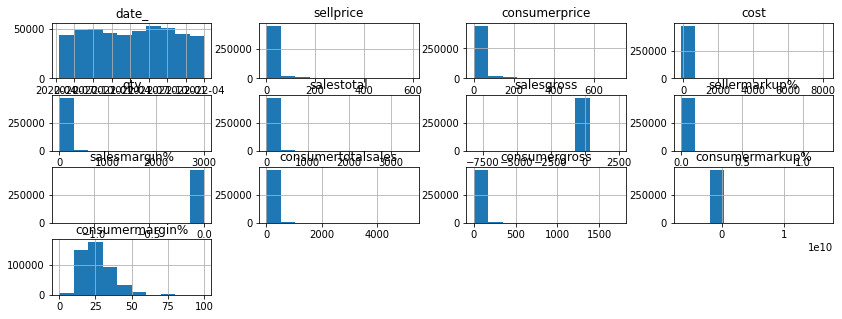

In [82]:
#data overView
data.hist(figsize=(14,5));

In [83]:
data['category'].value_counts()

اكسسوار     318541
مستلزمات    103042
ورقيات       52762
Name: category, dtype: int64

In [84]:
cosmo = data.category =='اكسسوار'
medical = data.category =='مستلزمات'
papers = data.category =='ورقيات'

In [85]:
data[medical].count()

date_                 103042
client                103042
product               103042
invoiceid             103042
category              103042
subcategory           103042
manufacturer          103042
location              103042
sellprice             103042
consumerprice         103042
cost                  103042
qty                   103042
salestotal            103042
salesgross            103042
sellermarkup%         103042
salesmargin%          103042
consumertotalsales    103042
consumergross         103042
consumermarkup%       103042
consumermargin%       103042
dtype: int64

In [86]:
data[papers].count()

date_                 52762
client                52762
product               52762
invoiceid             52762
category              52762
subcategory           52762
manufacturer          52762
location              52762
sellprice             52762
consumerprice         52762
cost                  52762
qty                   52762
salestotal            52762
salesgross            52762
sellermarkup%         52762
salesmargin%          52762
consumertotalsales    52762
consumergross         52762
consumermarkup%       52762
consumermargin%       52762
dtype: int64

In [87]:
data[cosmo].count()

date_                 318541
client                318541
product               318541
invoiceid             318541
category              318541
subcategory           318541
manufacturer          318541
location              318541
sellprice             318541
consumerprice         318541
cost                  318541
qty                   318541
salestotal            318541
salesgross            318541
sellermarkup%         318541
salesmargin%          318541
consumertotalsales    318541
consumergross         318541
consumermarkup%       318541
consumermargin%       318541
dtype: int64

In [88]:
#data[cosmo].mean() , data[medical].mean() , data[papers].mean()

**HEATMAP colors 'cmap = '' '**

supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

Text(0.5, 1.0, 'correlation ')

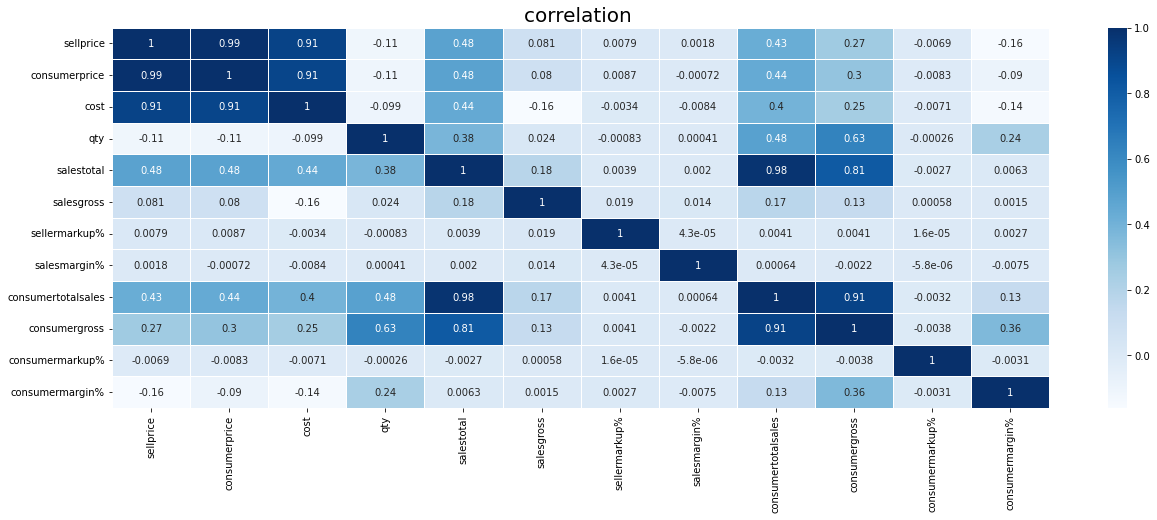

In [89]:
#correlation
f,ax=plt.subplots(1,1,figsize=(21,7))
snb.heatmap(data.corr(),annot=True,linewidths=.5,cmap='Blues')
ax.set_title('correlation ',fontsize=20)



Text(0.5, 1.0, 'count per category')

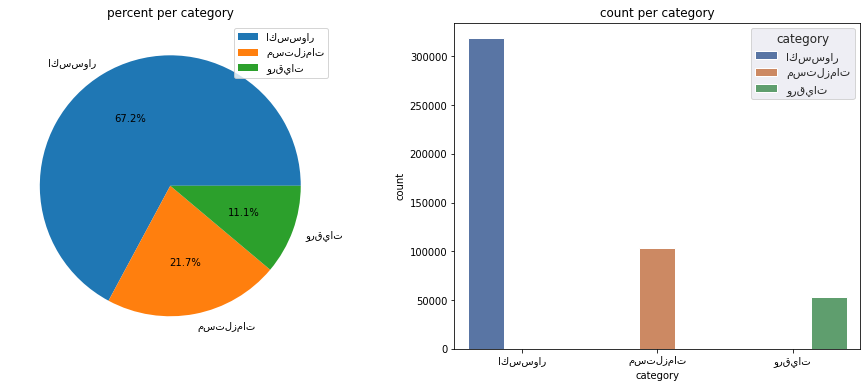

In [90]:
total_1=data['category'].value_counts()
total_1.index=['اكسسوار','مستلزمات','ورقيات']

f,ax=plt.subplots(1,2,figsize=(16,6))
total_1.plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('percent per category')
ax[0].set_ylabel('')
ax[0].legend()
snb.set_theme(style="darkgrid")

snb.countplot(x='category',hue="category",data=data,ax=ax[1])
ax[1].set_title('count per category')




Text(0.5, 1.0, 'count per category')

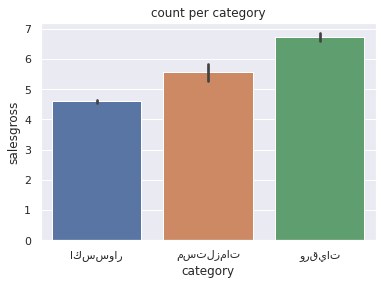

In [91]:
snb.barplot(data=data, x="category",y='salesgross').set_title('count per category')